# Prediction using Supervised ML (Task-1)

Predict the percentage of an student based on the no. of study hours.
<br>This is a simple linear regression task as it involves just 2 variables.
<br>What will be predicted score if a student studies for 9.25 hrs/ day?
    <br><br>**<i>Author :Aakash Lakhangaonkar</i>**

<br>

## Importing Libraries And Reading Data

In [117]:
##importing all the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [118]:
##read data into dataframe
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.sample(10)

,Hours,Scores
9,2.7,25
0,2.5,21
10,7.7,85
16,2.5,30
23,6.9,76
21,4.8,54
19,7.4,69
5,1.5,20
1,5.1,47
14,1.1,17


<br>

## EDA

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [120]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [121]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<br>

### Plot the Data

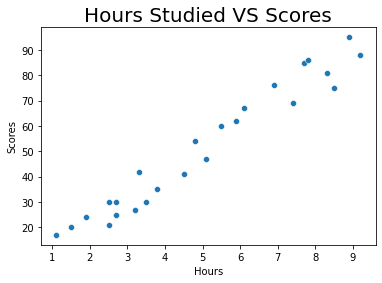

In [122]:
sns.scatterplot(df['Hours'],df['Scores'])
plt.title("Hours Studied VS Scores",size=20)
plt.show()

<br>

## Training the Algorithm

<br> 

### Splitting the Data

In [123]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<br>

### Fitting the Model

In [124]:
regression=LinearRegression()
regression.fit(X_train,y_train)
print("*** Model Trained ***")

*** Model Trained ***


<br>

### Plotting the Regression Line

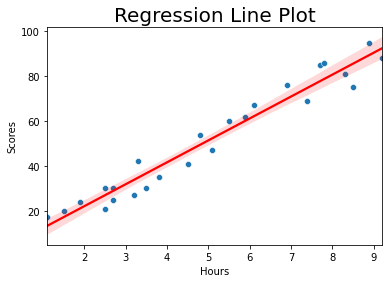

In [125]:
sns.scatterplot(df['Hours'],df['Scores'])
sns.regplot(X,y,color="red",scatter=False)
plt.title("Regression Line Plot",size=20)
plt.show()

<br>

## Prediction

<br>

### Comparing Predicted Values with Actual Values

In [126]:
##predicting values from test values
y_pred=regression.predict(X_test)

##converting predicted values and actual test values into a dataframe
pred_df=pd.DataFrame({"Predicted":y_pred,"Actual":y_test})
pred_df

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


<br>

### Evaluating the Model (Accuracy)

In [127]:
#mean absolute error:measures the average magnitude of the errors in a set of predictions, without considering their direction
print("Mean Absolute Error :",mean_absolute_error(y_pred,y_test))

Mean Absolute Error : 4.183859899002975


<br>

### Predicting a custom value

In [128]:
own_pred = regression.predict([[9.25]])
print("No of Hours = ",(hours[0]))
print("Predicted Score =",(round(own_pred[0],3)))

No of Hours =  9.25
Predicted Score = 93.692


<br> <br>

## According to the model if a student studies for 9.25 hours it is predicted that a he/she will score nearly 93.692 